# 🍕 Pizza Sales Analysis
This notebook answers key business questions using Python and Pandas on the pizza sales dataset.

## 📦 Step 1: Import Required Libraries and Load Dataset

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #plotly.express (px): Data visualization library jo easy aur quick plots banata hai.
import plotly.graph_objects as go #plotly.graph_objects (go): Advanced and customizable graphs banane ke liye
import plotly.io as pio   #plotly.io (pio): Graph templates ko customize karne ke liye
import plotly.colors as colors 
 

In [2]:

# Load data
df = pd.read_csv(r"pizza_sales.csv")
df.head()


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## 🧹 Step 2: Data Cleaning and Formatting

In [3]:

# Convert date and time
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.time


In [4]:

# Preview
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [5]:
df.head()


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## A. KPI Metrics

**Q1. What is the total revenue generated from all pizza sales?**

In [6]:
total_revenue=df['total_price'].sum()
print(f" Total Revenue: {total_revenue:,.2f}")


 Total Revenue: 817,860.05


**Q2. What is the average order value?**

In [7]:

total_revenue = df['total_price'].sum()
total_orders = df['order_id'].nunique()
average_order_value = total_revenue / total_orders
print(f"average order value : {average_order_value :,.2f}")


average order value : 38.31


**Q3. How many pizzas were sold in total?**

In [8]:
int(df['quantity'].sum())


49574

**Q4. How many total orders were placed?**

In [9]:
df['order_id'].nunique()


21350

**Q5. What is the average number of pizzas per order?**

In [10]:

total_pizzas = df['quantity'].sum()
average_pizzas_per_order = total_pizzas / total_orders
average_pizzas_per_order
print(f"average number of pizzas per order : {average_pizzas_per_order :,.0f}")


average number of pizzas per order : 2


## B. Trend Analysis

**Q6. What is the daily trend of total orders?**

In [11]:
print(df['order_date'].dtype)


datetime64[ns]


In [12]:
df['order_date'] = df['order_date'].astype(str).str.strip()  # remove whitespace




In [13]:
print(df['order_date'].head())
print(df['order_date'].isna().sum())


0    2015-01-01
1    2015-01-01
2    2015-01-01
3    2015-01-01
4    2015-01-01
Name: order_date, dtype: object
0


In [14]:
df['order_date'] = pd.to_datetime(df['order_date'])  # just to be safe


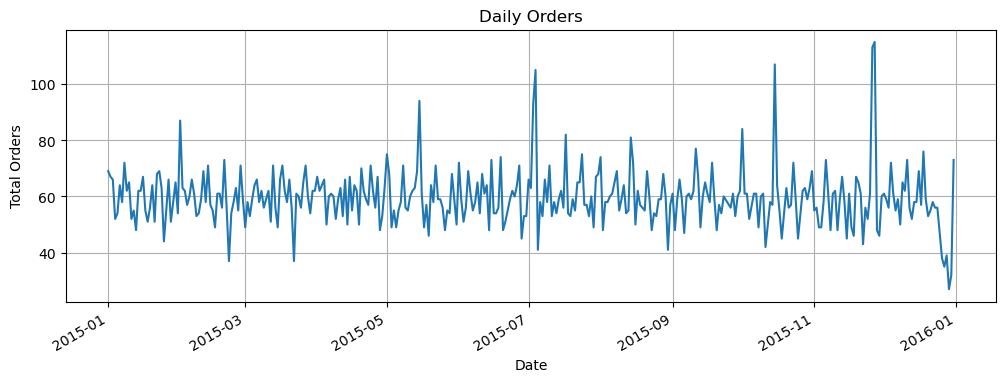

In [15]:

daily_orders = df.groupby('order_date')['order_id'].nunique()

daily_orders.plot(kind='line', figsize=(12, 4), title='Daily Orders')
plt.ylabel('Total Orders')
plt.xlabel('Date')
plt.grid()
plt.show()



**Q7. What is the hourly trend of pizza orders?**

In [16]:
print(df['order_time'].head())
print(df['order_time'].dtype)




0    11:38:36
1    11:57:40
2    11:57:40
3    11:57:40
4    11:57:40
Name: order_time, dtype: object
object


In [17]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.time


In [18]:
df['order_hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.hour


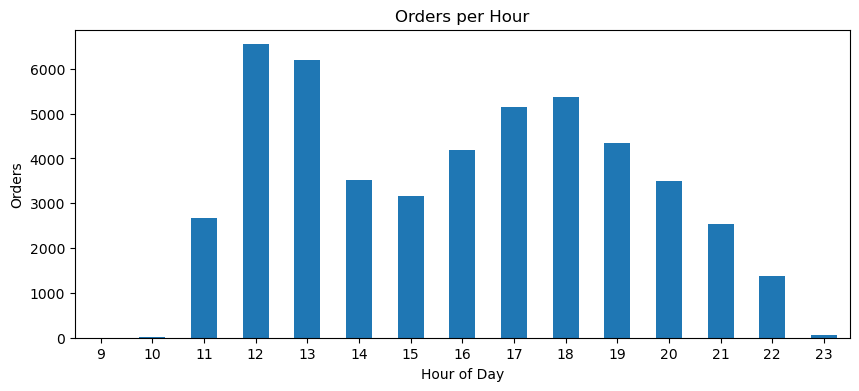

In [26]:

hourly_orders = df.groupby('order_hour')['order_id'].count()
hourly_orders.plot(kind='bar', figsize=(10,4), title='Orders per Hour')
plt.ylabel('Orders')
plt.xlabel('Hour of Day')
plt.xticks(rotation=0)
#plt.grid()
plt.show()


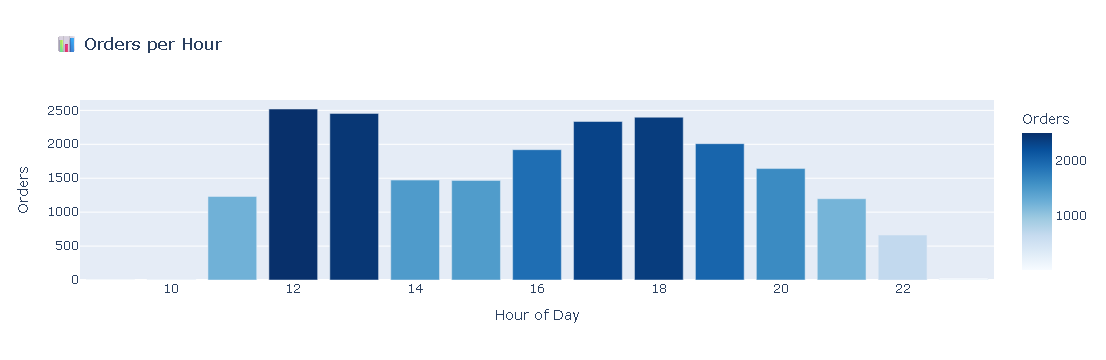

In [25]:
# Q7. What is the hourly trend of pizza orders?

import plotly.express as px

hourly_orders = df.groupby('order_hour')['order_id'].nunique().reset_index()
hourly_orders.columns = ['Hour', 'Number of Orders']

fig = px.bar(
    hourly_orders,
    x='Hour',
    y='Number of Orders',
    title='📊 Orders per Hour',
    labels={'Hour': 'Hour of Day', 'Number of Orders': 'Orders'},
    color='Number of Orders',
    color_continuous_scale='Blues'
)

fig.show()


## C. Category & Size Insights

**Q8. What percentage of total sales comes from each pizza category?**

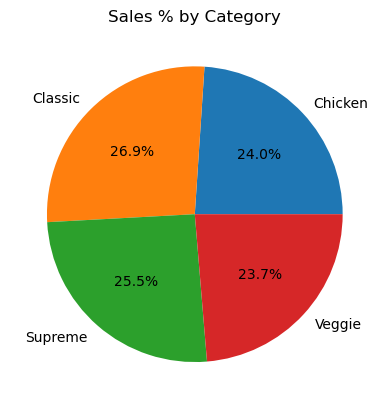

In [20]:

category_sales = df.groupby('pizza_category')['total_price'].sum()
category_sales_percent = category_sales / category_sales.sum() * 100
category_sales_percent.plot(kind='pie', autopct='%1.1f%%', title='Sales % by Category')
plt.ylabel('')
plt.show()


**Q9. What percentage of sales comes from each pizza size?**

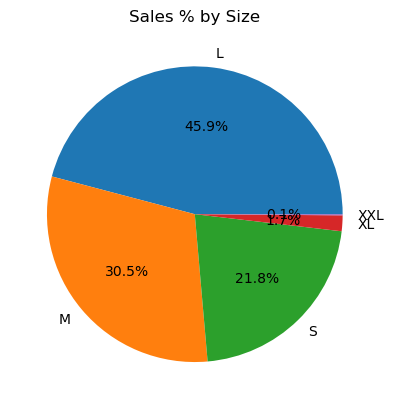

In [21]:

size_sales = df.groupby('pizza_size')['total_price'].sum()
size_sales_percent = size_sales / size_sales.sum() * 100
size_sales_percent.plot(kind='pie', autopct='%1.1f%%', title='Sales % by Size')
plt.ylabel('')
plt.show()


**Q10. How many pizzas were sold per category?**

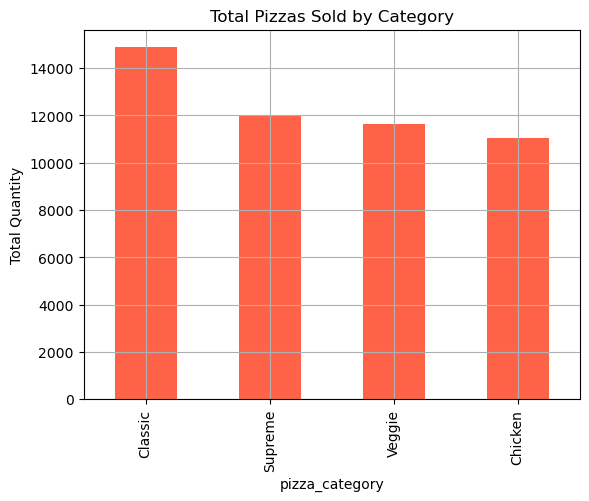

In [22]:

category_quantity = df.groupby('pizza_category')['quantity'].sum().sort_values(ascending=False)
category_quantity.plot(kind='bar', title='Total Pizzas Sold by Category', color='tomato')
plt.ylabel('Total Quantity')
plt.grid()
plt.show()


## D. Product Performance

**Q11. Which 5 pizzas were sold the most?**

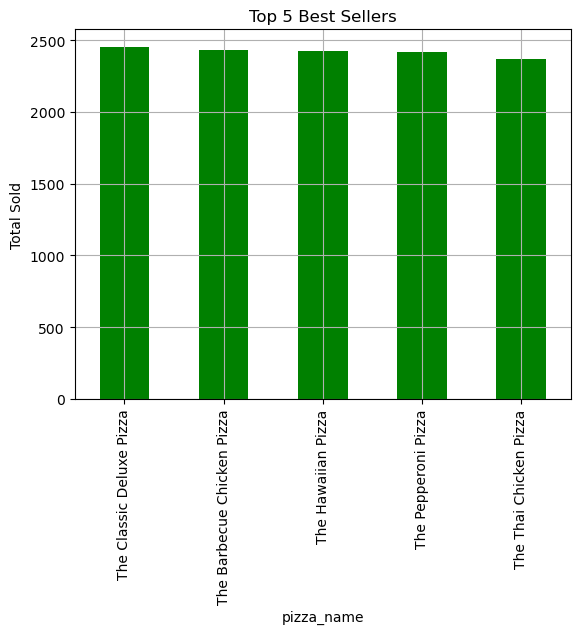

In [23]:

top_5_pizzas = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(5)
top_5_pizzas.plot(kind='bar', title='Top 5 Best Sellers', color='green')
plt.ylabel('Total Sold')
plt.grid()
plt.show()


**Q12. Which 5 pizzas were sold the least?**

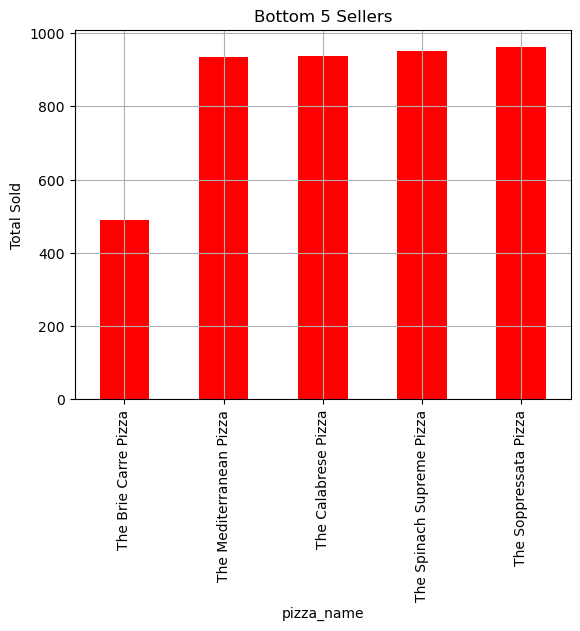

In [24]:

bottom_5_pizzas = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=True).head(5)
bottom_5_pizzas.plot(kind='bar', title='Bottom 5 Sellers', color='red')
plt.ylabel('Total Sold')
plt.grid()
plt.show()
